In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing the data set

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/laptop_data.csv")
data.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [ ]:
len(data)

1273

In [ ]:
data_columns = data.columns
data_columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'TouchScreen', 'Ips',
       'Ppi', 'Cpu_brand', 'HDD', 'SSD', 'Gpu_brand', 'Os'],
      dtype='object')

In [ ]:
data.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [ ]:
data["Ram"].value_counts()

8     613
4     365
16    198
6      35
12     25
32     17
2      16
24      3
64      1
Name: Ram, dtype: int64

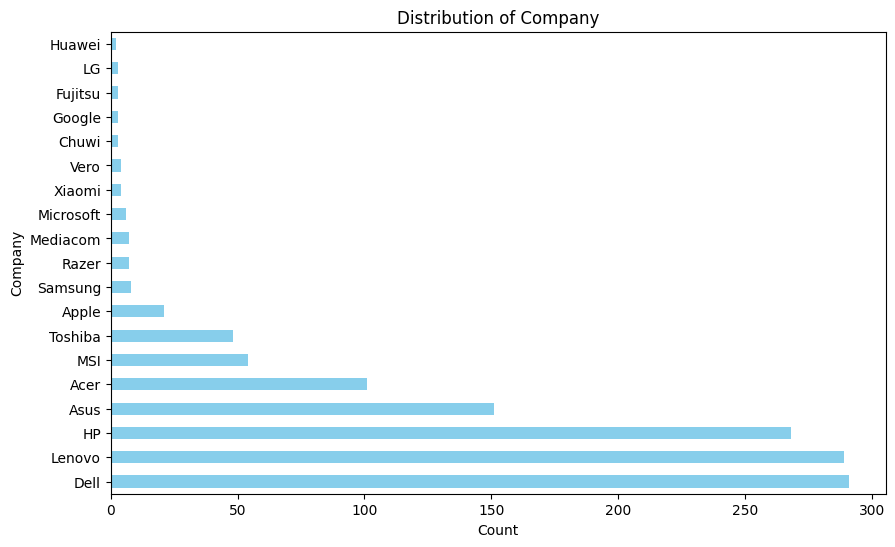

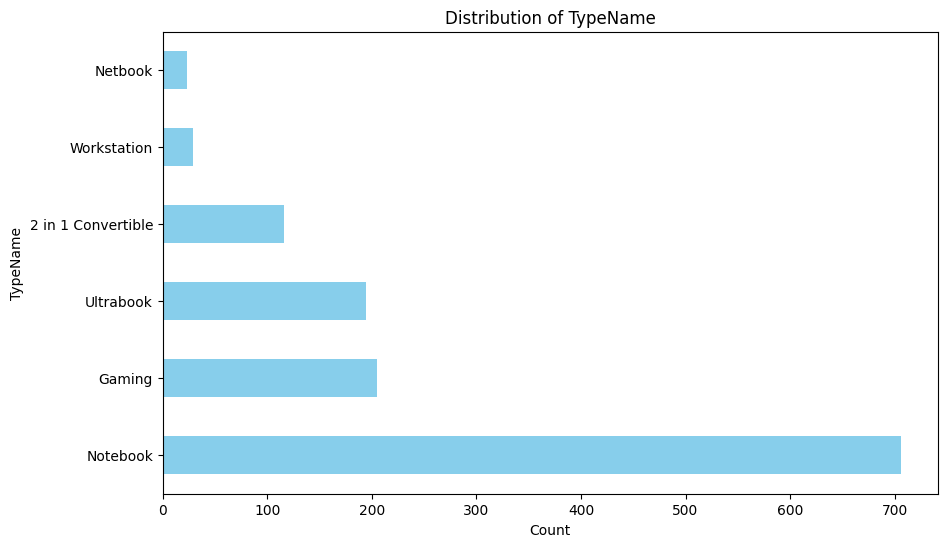

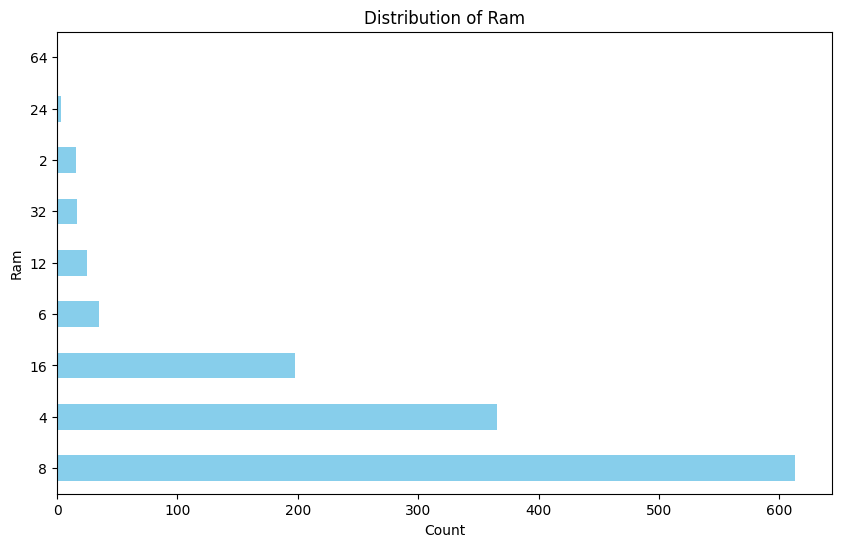

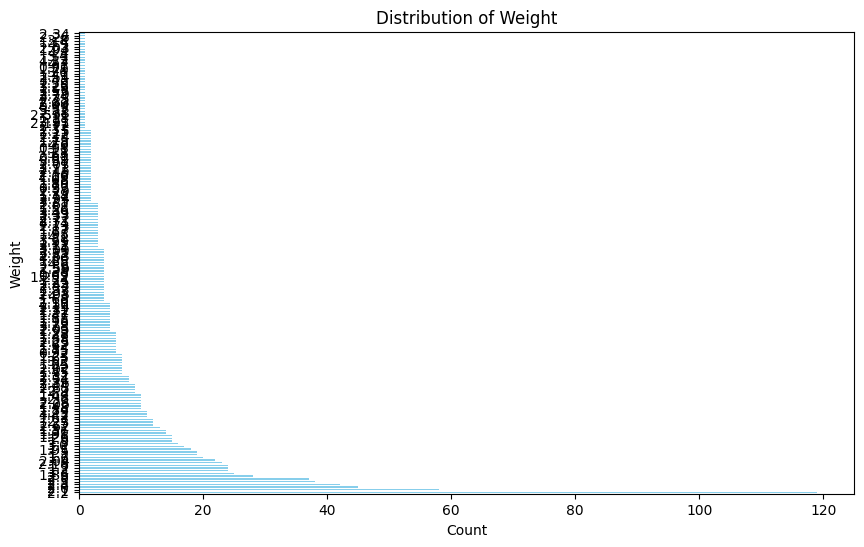

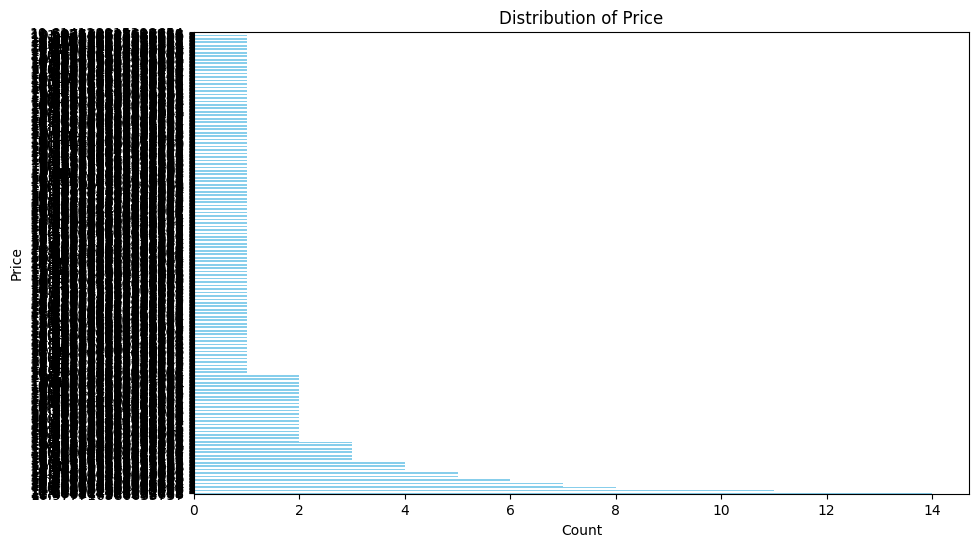

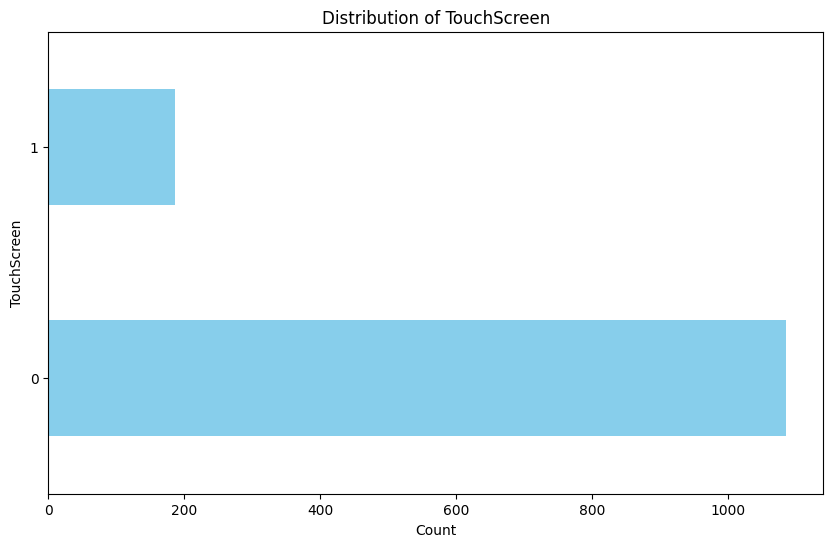

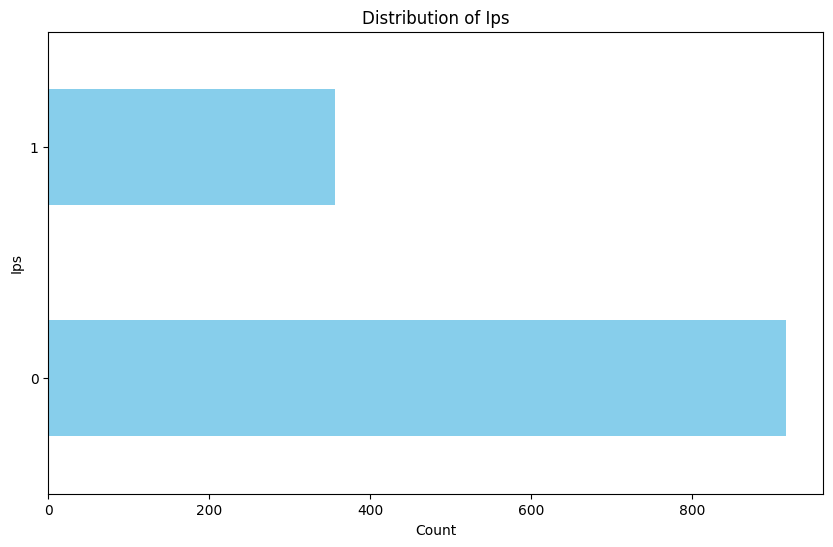

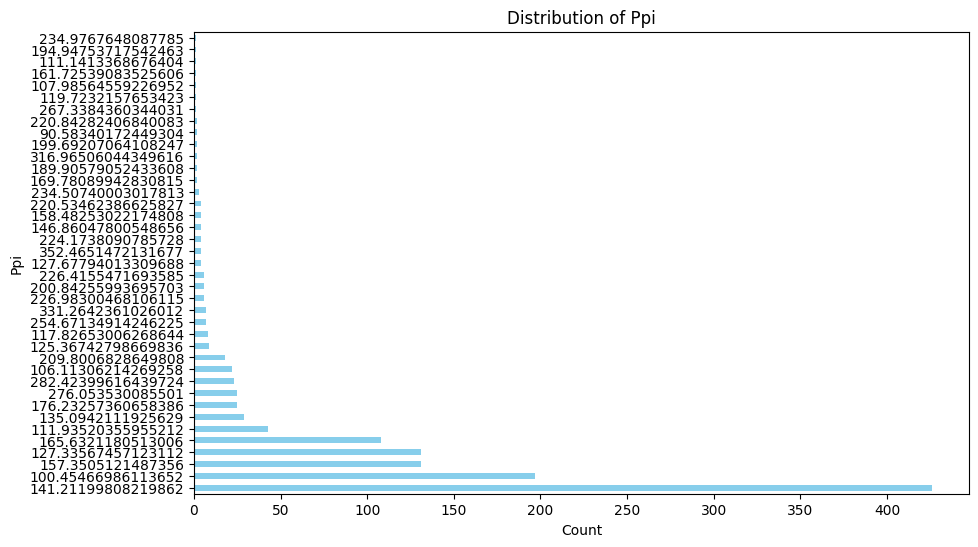

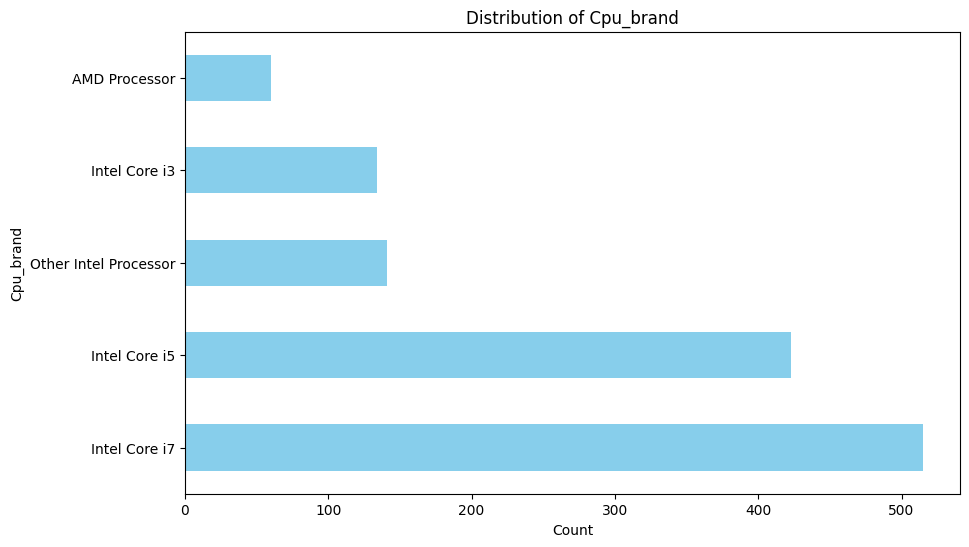

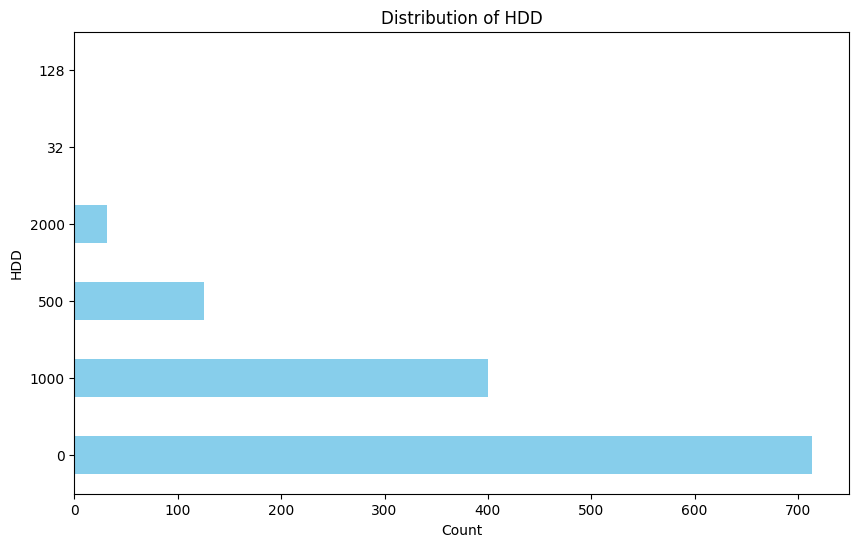

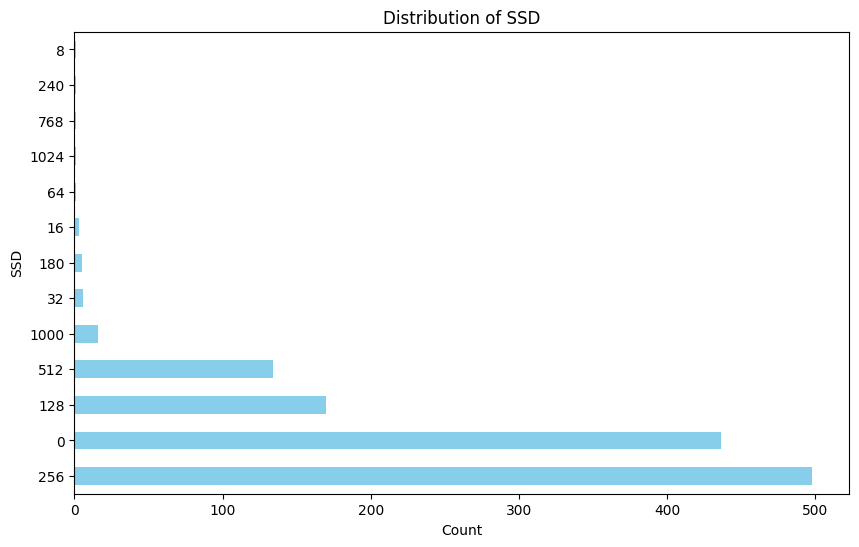

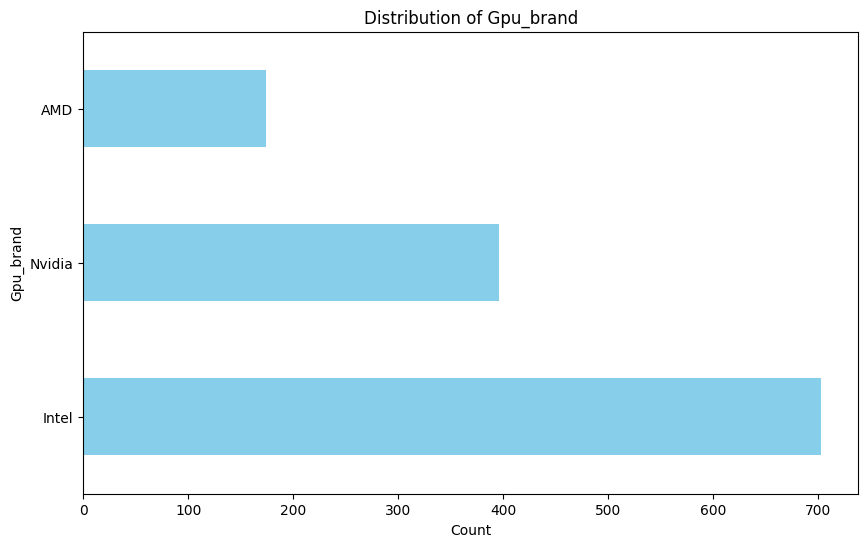

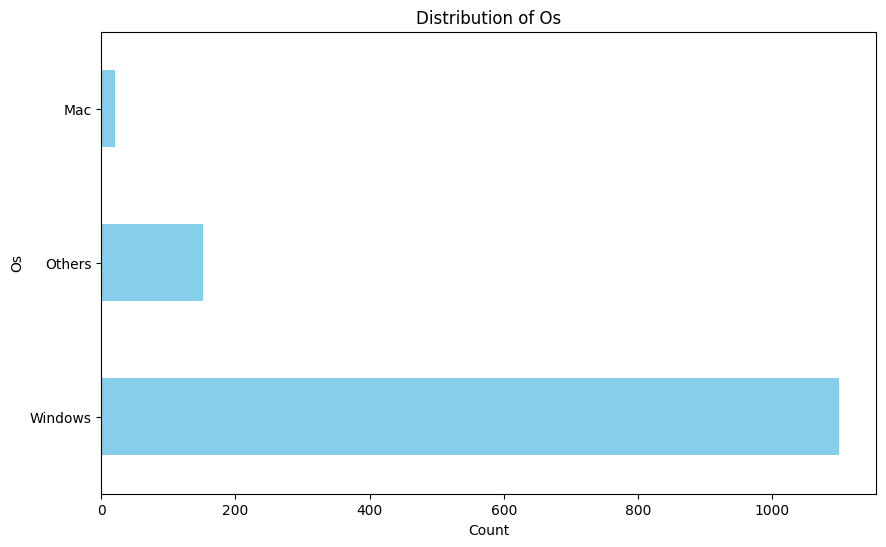

In [ ]:
for col in data.columns:
    # Count values for each category
    value_counts = data[col].value_counts()

    # Plot a horizontal bar chart
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='barh', color='skyblue')

    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

In [ ]:
for col in data.columns:
    # Count unique values for each category
    num_categories = data[col].nunique()

    print(f"{col} has {num_categories} unique categories")


Company has 19 unique categories
TypeName has 6 unique categories
Ram has 9 unique categories
Weight has 171 unique categories
Price has 791 unique categories
TouchScreen has 2 unique categories
Ips has 2 unique categories
Ppi has 39 unique categories
Cpu_brand has 5 unique categories
HDD has 6 unique categories
SSD has 13 unique categories
Gpu_brand has 3 unique categories
Os has 3 unique categories


# preprocessing

## visualization to see if there is any outlier on the data

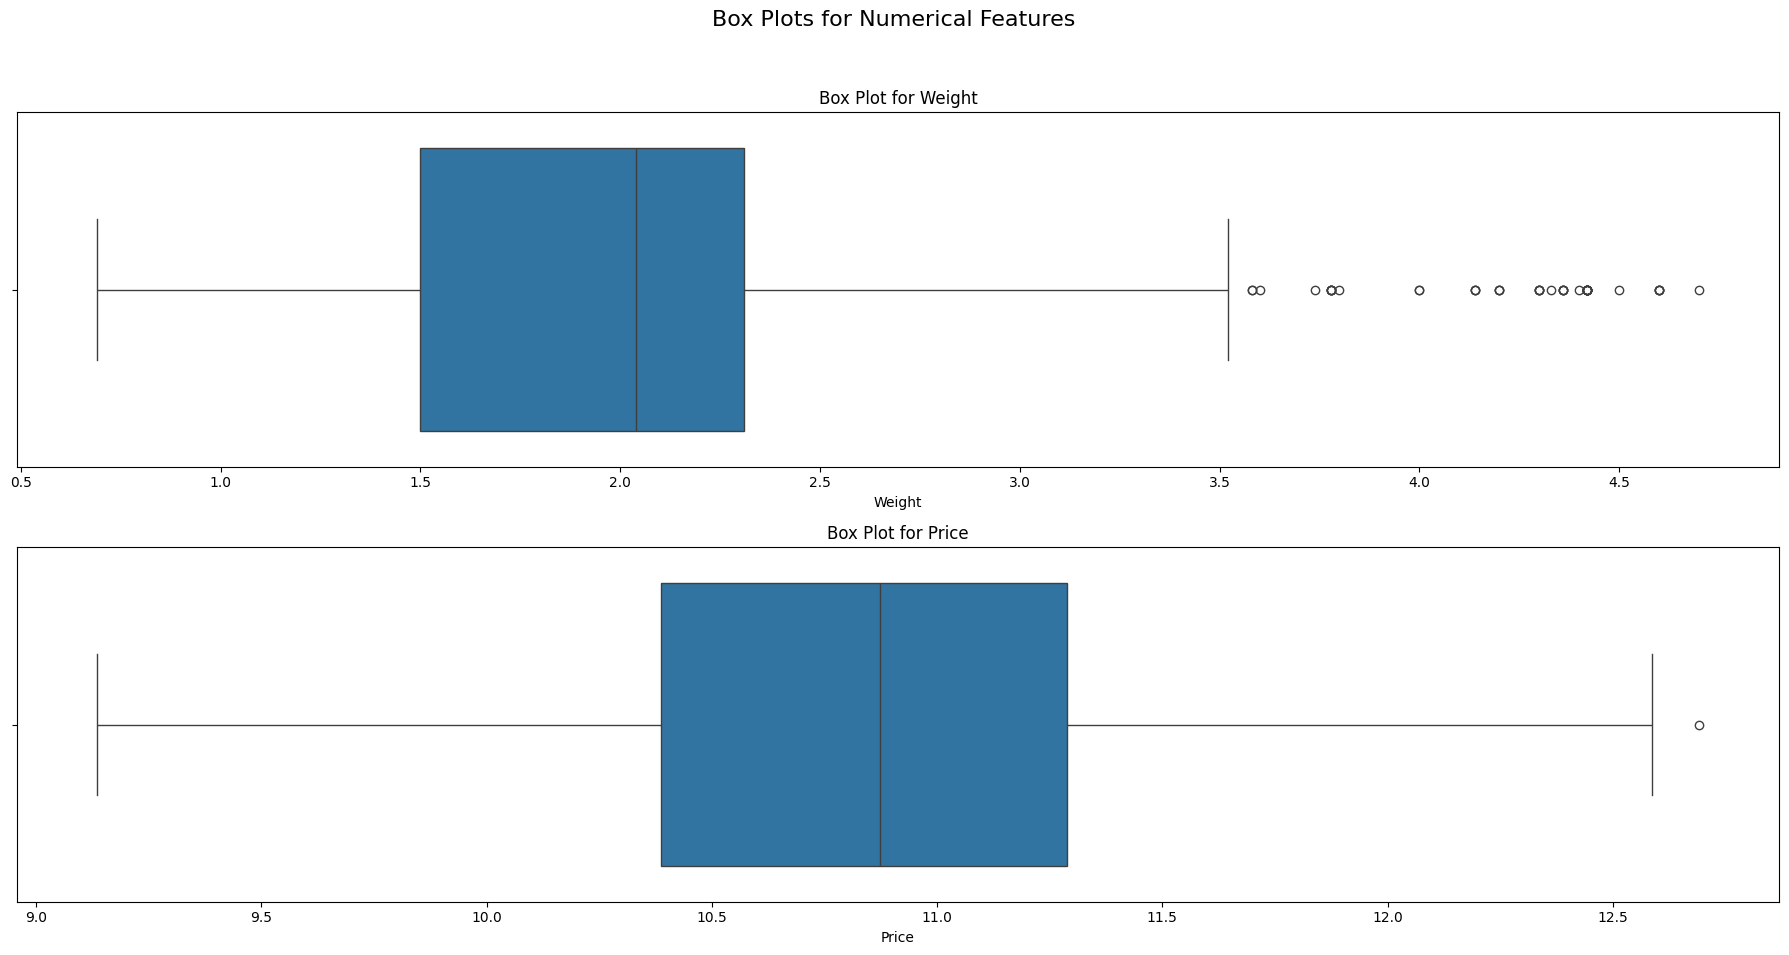

In [ ]:
numerical_features = ['Weight', 'Price']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 10))
fig.suptitle('Box Plots for Numerical Features', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through numerical features and create box plots
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=data[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot for {feature}')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## handling the outliers

In [ ]:
# handle outliers with transformation avoiding deleting as this can impact the small data set
numerical_features = ['Weight', 'Price']

for feature in numerical_features:
    data[feature] = np.log1p(data[feature])

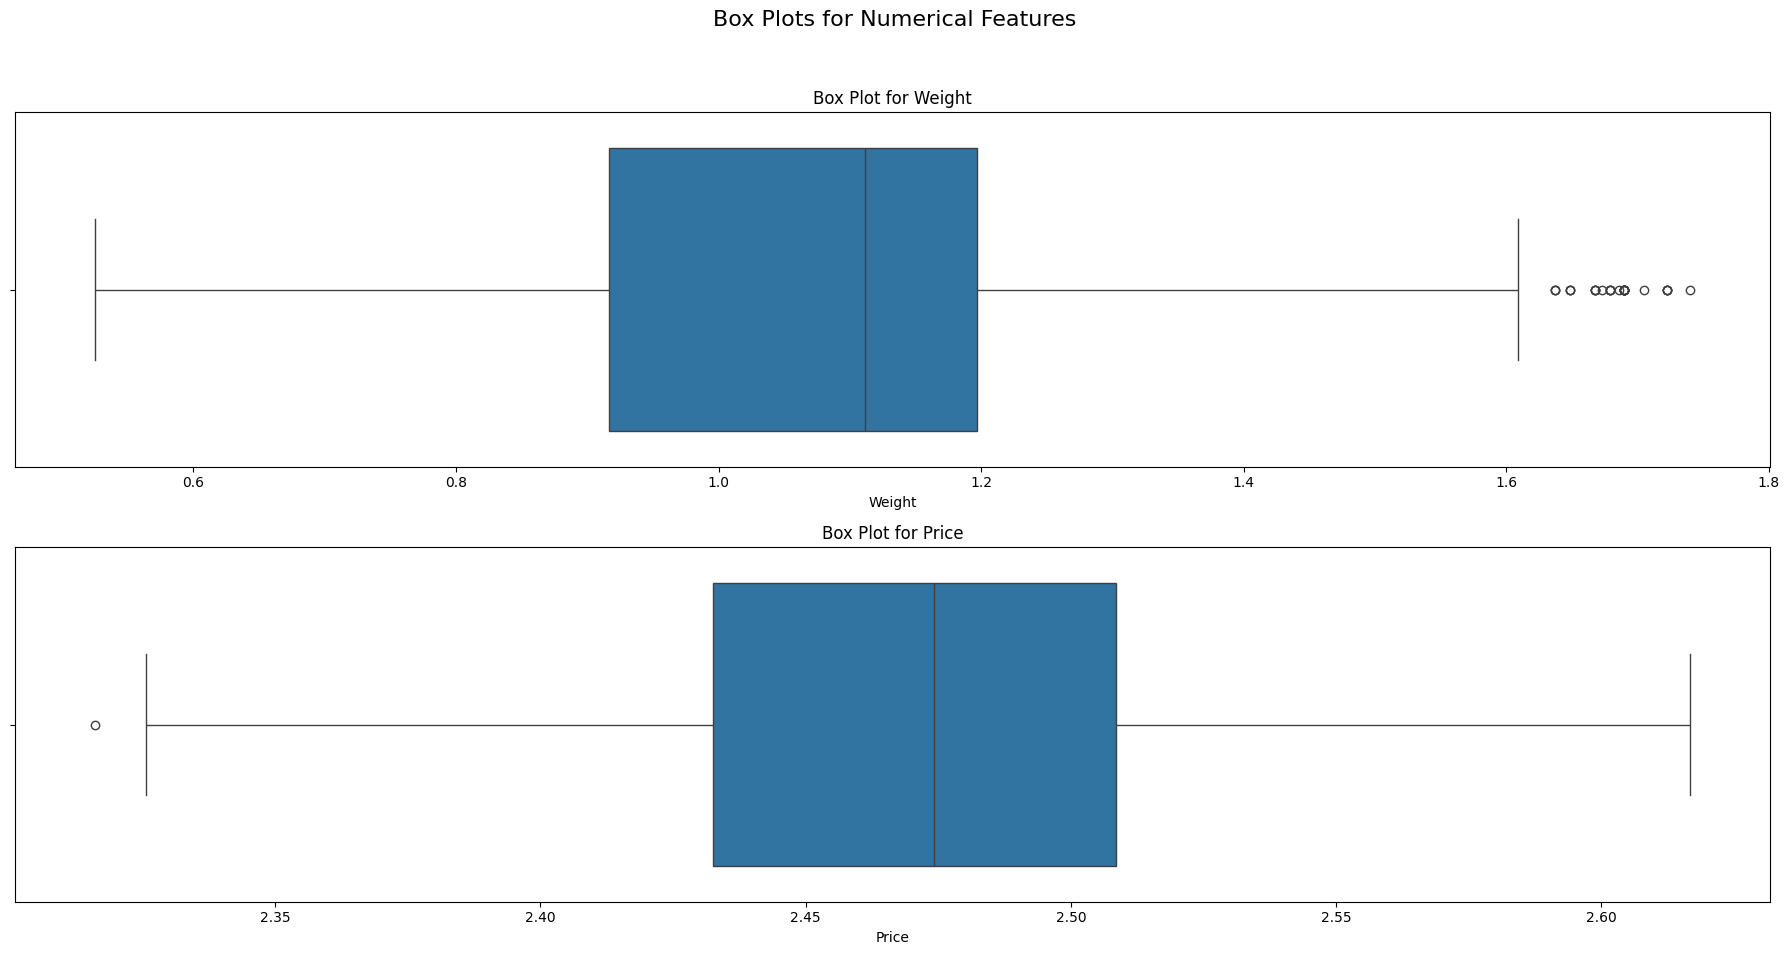

In [ ]:
numerical_features = ['Weight', 'Price']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 10))
fig.suptitle('Box Plots for Numerical Features', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through numerical features and create box plots
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=data[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot for {feature}')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
data.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,0.862890,2.499447,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,0.850151,2.466130,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.050822,2.427448,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.040277,2.550575,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,0.862890,2.523574,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [ ]:
# check if there is any missing values
data.isna().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

# Experiment 1

## splitting the data into independent and dependent

In [ ]:
X = data.drop('Price', axis=1)
y = data['Price']

## convert the categorical data into numerical and scaling the data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler

categorical_columns = ['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Ram', 'SSD', 'HDD', 'Os', 'Ppi']
numerical_columns = ['Weight']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns),
        ('num', StandardScaler(), numerical_columns)
    ], remainder='passthrough')

X_transformed = preprocessor.fit_transform(X)

## Splitting the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1018, 97), (255, 97), (1018,), (255,))

# Fitting the model

In [ ]:
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    function to fit and score on different models
    """

    np.random.seed(42)
    model_score = {}
    predictions = {}

    for name, model in models.items():
        model.fit(x_train, y_train)

        model_score[name] = model.score(x_test, y_test)
        predictions[name] = model.predict(x_test);

    return model_score, predictions

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

models = {
    "KNN": KNeighborsRegressor(),
    "SVR": SVR(),
    "RFR": RandomForestRegressor()
}

models_score, predictions = fit_and_score(models, x_train, x_test, y_train, y_test)

In [ ]:
models_score

{'KNN': 0.8631244612416243,
 'SVR': 0.23440827844323475,
 'RFR': 0.8624113053137862}

In [ ]:
y_train

490     2.476138
405     2.526597
156     2.435339
650     2.558202
770     2.489057
          ...   
1044    2.475135
1095    2.456072
1130    2.435339
860     2.461431
1126    2.411194
Name: Price, Length: 1018, dtype: float64

# Experiment 2

In [ ]:
# the score is alittle bit bad so as an extra step i will scale the y

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

y_train_scaled = scaler.fit_transform(y_train_np.reshape(-1, 1)).flatten()
y_test_scaled = scaler.transform(y_test_np.reshape(-1, 1)).flatten()

In [ ]:
y_train_scaled

array([ 0.11963913,  1.08063732, -0.65737648, ..., -0.65737648,
       -0.16045505, -1.11722859])

In [ ]:
models_score, predictions = fit_and_score(models, x_train, x_test, y_train_scaled, y_test_scaled)

models_score

{'KNN': 0.863124461241624, 'SVR': 0.881265137167198, 'RFR': 0.8629473200911426}

In [ ]:
# as SVR is the highest prediction we will go with it

y_pred = predictions['SVR']
y_pred

array([-0.55541254,  0.78477784,  0.61534299,  1.13312465,  0.21080929,
        1.25041541, -2.05024657, -1.5081733 ,  0.14305077,  1.51635739,
       -0.01762032, -0.03039764,  0.51754793, -0.83085022,  0.81286047,
        0.85143023,  1.03456789, -1.21942522,  1.21982819,  1.00808875,
       -1.66452728, -0.03405031, -0.44775459,  0.8601098 , -1.40176039,
        1.34947599, -0.39400929,  0.23477184,  0.44580422,  0.18783386,
        0.4451051 ,  0.1170703 , -1.24583913, -0.74636553,  0.97648711,
       -0.04402672, -0.30531647,  0.06133991,  1.04729489, -1.28574858,
       -1.30641886,  1.44112474,  0.29123312,  0.57275271, -1.11849466,
        0.82569836,  1.04442629, -0.91132661,  0.35462894,  0.16299393,
        0.41516199,  1.22175862,  0.11084618, -0.9383361 ,  0.09012027,
        0.03922985,  0.6711022 , -1.06961625,  0.3244009 ,  1.90138927,
        1.10020225,  0.52654928, -0.02138313, -1.79018212,  0.78066177,
       -0.55193976, -1.04669823, -0.53167825, -0.47216877, -0.01

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test_scaled, y_pred)
rmse = mean_squared_error(y_test_scaled, y_pred, squared=False)
mae = mean_absolute_error(y_test_scaled, y_pred)
r2 = r2_score(y_test_scaled, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.12391813223994366
Root Mean Squared Error: 0.35202007363209226
Mean Absolute Error: 0.2762911370980117
R-squared: 0.881265137167198


# experiment 3

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/laptop_data.csv")
data.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [ ]:
X = data.drop('Price', axis=1)
y = data['Price']

In [ ]:
# dealing with weight ram, ... as numerical not categorical

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler

categorical_columns = ['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os']
numerical_columns = ['Weight', 'Ram', 'SSD', 'HDD', 'Ppi']

exp3_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns),
        ('num', StandardScaler(), numerical_columns)
    ], remainder='passthrough')

X_transformed = exp3_preprocessor.fit_transform(X)

In [ ]:
X_transformed.shape

(1273, 38)

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

exp_3_x_train, exp_3_x_test, exp_3_y_train, exp_3_y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [ ]:
models_score, predictions = fit_and_score(models, exp_3_x_train, exp_3_x_test, exp_3_y_train, exp_3_y_test)

In [ ]:
models_score

{'KNN': 0.8434364635860359,
 'SVR': 0.880096378593167,
 'RFR': 0.8851606144320213}

In [ ]:
y_pred = predictions['SVR']

mse = mean_squared_error(exp_3_y_test, y_pred)
rmse = mean_squared_error(exp_3_y_test, y_pred, squared=False)
mae = mean_absolute_error(exp_3_y_test, y_pred)
r2 = r2_score(exp_3_y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.04749665922625294
Root Mean Squared Error: 0.2179372827816593
Mean Absolute Error: 0.1692321436915886
R-squared: 0.880096378593167


# Experiment 4

In [ ]:
# scaling y data

scaler = StandardScaler()

y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

y_train_scaled = scaler.fit_transform(y_train_np.reshape(-1, 1)).flatten()
y_test_scaled = scaler.transform(y_test_np.reshape(-1, 1)).flatten()

In [ ]:
models_score, predictions = fit_and_score(models, exp_3_x_train, exp_3_x_test, y_train_scaled, y_test_scaled)

In [ ]:
models_score

{'KNN': 0.8491334095271466,
 'SVR': 0.8840289540896875,
 'RFR': 0.8895446921469485}

In [ ]:
y_pred = predictions['SVR']

mse = mean_squared_error(y_test_scaled, y_pred)
rmse = mean_squared_error(y_test_scaled, y_pred, squared=False)
mae = mean_absolute_error(y_test_scaled, y_pred)
r2 = r2_score(y_test_scaled, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.1210336632413959
Root Mean Squared Error: 0.34789892676091416
Mean Absolute Error: 0.2706281487427289
R-squared: 0.8840289540896875


In [ ]:
y_pred = predictions['RFR']

mse = mean_squared_error(y_test_scaled, y_pred)
rmse = mean_squared_error(y_test_scaled, y_pred, squared=False)
mae = mean_absolute_error(y_test_scaled, y_pred)
r2 = r2_score(y_test_scaled, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.11527714033250906
Root Mean Squared Error: 0.33952487439436463
Mean Absolute Error: 0.2619938714254465
R-squared: 0.8895446921469485


# Experiment 5

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/laptop_data.csv")
data.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [ ]:
# using label encoder instead of one hot encoder
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os']

# Encode The Dataset Labels
label_encoder = LabelEncoder()
for col in categorical_columns:
  data[col] = label_encoder.fit_transform(data[col])


In [ ]:
data.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,1,4,8,1.37,11.175755,0,1,226.983005,2,0,128,1,0
1,1,4,8,1.34,10.776777,0,0,127.677940,2,0,0,1,0
2,7,3,8,1.86,10.329931,0,0,141.211998,2,0,256,1,1
3,1,4,16,1.83,11.814476,0,1,220.534624,3,0,512,0,0
4,1,4,8,1.37,11.473101,0,1,226.983005,2,0,256,1,0


In [ ]:
X = data.drop('Price', axis=1)
y = data['Price']

In [ ]:

scaler = StandardScaler()

# Fit the scaler on the training data and transform the features
x_scaled = scaler.fit_transform(X)

In [ ]:
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [ ]:
models_score, predictions = fit_and_score(models, x_train, x_test, y_train, y_test)

models_score

{'KNN': 0.7889012762041067,
 'SVR': 0.8647194272071972,
 'RFR': 0.879355914550268}

In [ ]:
x_train.shape

(1018, 12)

In [ ]:
np.random.seed(42)

rfr_model = RandomForestRegressor()

rfr_model.fit(exp_3_x_train, exp_3_y_train)

rfr_model.score(exp_3_x_test, exp_3_y_test)

0.8852574354110367

In [ ]:
rfr_model.n_features_in_

38

In [ ]:
label_encoder.classes_

array(['Mac', 'Others', 'Windows'], dtype=object)

## doing prediction on experiment two without scalling y

In [ ]:
def predict_price(custom_data, preprocessor, model):
  print(custom_data)

  preprocessed_data = preprocessor.transform(custom_data)
  print(preprocessed_data.shape)
  predictions = model.predict(preprocessed_data)

  return predictions

In [ ]:
custom_data = pd.DataFrame({
    'Company': ['HP', 'Apple'],
    'TypeName': ['Notebook', 'Ultrabook'],
    'Ram': [8, 8],
    'Weight': [2.5, 1.37],
    'TouchScreen': [0, 0],
    'Ips': [1, 1],
    'Ppi': [150, 226.983005],
    'Cpu_brand': ['Intel Core i5', 'Intel Core i5'],
    'HDD': [1000, 0],
    'SSD': [256, 128],
    'Gpu_brand': ['Nvidia', 'Intel'],
    'Os': ['Windows', 'Mac'],
}
)

predicted_prices = predict_price(custom_data, exp3_preprocessor, rfr_model)
predicted_prices

  Company   TypeName  Ram  Weight  TouchScreen  Ips         Ppi  \
0      HP   Notebook    8    2.50            0    1  150.000000   
1   Apple  Ultrabook    8    1.37            0    1  226.983005   

       Cpu_brand   HDD  SSD Gpu_brand       Os  
0  Intel Core i5  1000  256    Nvidia  Windows  
1  Intel Core i5     0  128     Intel      Mac  
(2, 38)


array([10.88460764, 11.18891447])

In [ ]:
def get_user_input():
  company = input("Enter Company (e.g., HP, Apple): ")
  type_name = input("Enter TypeName (e.g., Notebook, Ultrabook): ")
  ram = int(input("Enter RAM (in GB): "))
  weight = float(input("Enter Weight (in kg): "))
  touch_screen = int(input("Enter TouchScreen (0 for No, 1 for Yes): "))
  ips = int(input("Enter IPS (0 for No, 1 for Yes): "))
  ppi = float(input("Enter PPI: "))
  cpu_brand = input("Enter CPU Brand (e.g., Intel Core i5): ")
  hdd = int(input("Enter HDD (in GB, 0 if none): "))
  ssd = int(input("Enter SSD (in GB, 0 if none): "))
  gpu_brand = input("Enter GPU Brand: ")
  os = input("Enter OS: ")

  user_data = {
      'Company': [company],
      'TypeName': [type_name],
      'Ram': [ram],
      'Weight': [weight],
      'TouchScreen': [touch_screen],
      'Ips': [ips],
      'Ppi': [ppi],
      'Cpu_brand': [cpu_brand],
      'HDD': [hdd],
      'SSD': [ssd],
      'Gpu_brand': [gpu_brand],
      'Os': [os],
  }

  custom_data = pd.DataFrame(user_data)

  predicted_prices = predict_price(custom_data, exp3_preprocessor, rfr_model)

  print(f"Predicted Prices: {predicted_prices}")

In [ ]:
get_user_input()

Enter Company (e.g., HP, Apple): Apple
Enter TypeName (e.g., Notebook, Ultrabook): Notebook
Enter RAM (in GB): 64
Enter Weight (in kg): 3
Enter TouchScreen (0 for No, 1 for Yes): 1
Enter IPS (0 for No, 1 for Yes): 1
Enter PPI: 150.00
Enter CPU Brand (e.g., Intel Core i5): Intel Core i5
Enter HDD (in GB, 0 if none): 1000
Enter SSD (in GB, 0 if none): 512
Enter GPU Brand: Intel
Enter OS: Windows
  Company  TypeName  Ram  Weight  TouchScreen  Ips    Ppi      Cpu_brand  \
0   Apple  Notebook   64     3.0            1    1  150.0  Intel Core i5   

    HDD  SSD Gpu_brand       Os  
0  1000  512     Intel  Windows  
(1, 38)
Predicted Prices: [11.50505323]
